In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
indv = pd.read_csv('/gpfs/commons/groups/knowles_lab/data/ADSP_reguloML/ADSP_vcf/phenotype_file/release_36K/pheno_ADSP_IBD.tsv', sep = '\t')

/gpfs/commons/home/tlin/.conda/envs/polyfun/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3072: DtypeWarning: Columns (8) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
indv

,SUBJID,SampleID,Sex,Diagnosis,APOE_reported,Age,Race,Ethnicity,FamID,source,...,PC13,PC14,PC15,PC16,PC17,PC18,PC19,PC20,Sequencing_Center,Sequencing_Platform
0,ADNI_002_S_0685,ADNI_002_S_0685,1.0,0.0,33.0,90.0,5.0,0.0,NaN,ADNI,...,1.2494,-1.9800,0.4404,-1.6879,0.3571,1.1045,-2.2589,-2.8125,Illumina,Illumina_HiSeq_2000
1,ADNI_002_S_1155,ADNI_002_S_1155,0.0,0.0,33.0,69.0,5.0,0.0,NaN,ADNI,...,1.1720,1.3591,1.1451,-0.0500,-0.3733,1.1487,-0.0178,-2.1215,Illumina,Illumina_HiSeq_2000
2,ADNI_002_S_1261,ADNI_002_S_1261,1.0,0.0,33.0,82.0,5.0,0.0,NaN,ADNI,...,-1.8191,0.4448,0.3960,-0.4971,0.0639,0.7521,-0.1974,-2.4702,Illumina,Illumina_HiSeq_2000
3,ADNI_002_S_2010,ADNI_002_S_2010,1.0,0.0,34.0,68.0,6.0,0.0,NaN,ADNI,...,1.2155,-0.9010,1.2350,-0.5126,0.5264,2.6370,-1.3014,-2.9664,Illumina,Illumina_HiSeq_2000
4,ADNI_002_S_2043,ADNI_002_S_2043,1.0,0.0,34.0,73.0,5.0,0.0,NaN,ADNI,...,0.6544,-0.1074,1.2218,-0.5946,1.3398,0.5496,-1.2872,-4.5351,Illumina,Illumina_HiSeq_2000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27066,A-CUHS-CU009824,A-CUHS-CU009824-BL-COL-41567BL1,1.0,0.0,33.0,62.0,6.0,1.0,CU0408F,Family_based,...,1.7216,0.4859,-0.7507,0.2706,-1.3342,-0.6434,-0.8623,-2.5705,WashU,Illumina_HiSeqX
27067,A-CUHS-CU005861,A-CUHS-CU005861-BL-COL-49677BL1,1.0,0.0,33.0,58.0,6.0,1.0,CU0170F,Family_based,...,2.9415,-0.6988,-0.9819,-0.5281,-0.2099,2.5507,-0.1355,-1.9739,WashU,Illumina_HiSeqX
27068,A-CUHS-CU009816,A-CUHS-CU009816-BL-COL-41553BL1,1.0,0.0,34.0,76.0,5.0,1.0,CU0400F,Family_based,...,1.5183,-0.0754,-0.1619,-0.4543,-0.7667,0.9952,0.2616,-2.2645,WashU,Illumina_HiSeqX
27069,A-CUHS-CU011550,A-CUHS-CU011550-BL-COL-56372BL1,1.0,0.0,44.0,66.0,6.0,1.0,CU1711F,Family_based,...,-0.5324,0.6456,-0.6681,-0.8344,0.5677,-0.8421,-0.8672,-4.6620,USUHS,Illumina_NovaSeq


/gpfs/commons/home/tlin/.conda/envs/polyfun/lib/python3.6/site-packages/ipykernel_launcher.py:13: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "type" which is no longer supported as of 3.3 and will become an error two minor releases later
  del sys.path[0]


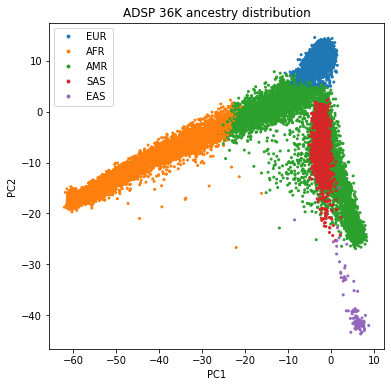

In [34]:
fig, ax = plt.subplots(figsize=(6, 6))
colors = {'EUR':'tab:blue', 'AFR':'tab:orange', 'AMR':'tab:green', 'SAS':'tab:red', 'EAS':'tab:purple'}

ax.scatter(indv.PC1, indv.PC2, 4, c = indv.predicted_ancestry.map(colors))

legend_elements = [plt.Line2D([0], [0], marker='o', color='w', label=key, markersize=5, markerfacecolor=value) for key, value in colors.items()]

# Add legend
ax.legend(handles=legend_elements, loc='best')
ax.set_title('ADSP 36K ancestry distribution')
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
plt.savefig('/gpfs/commons/home/tlin/pic/ancestry_distribution.pdf', type='pdf')

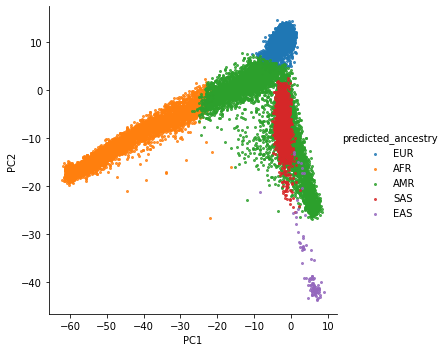

In [26]:
sns.lmplot(x='PC1', y='PC2', data=indv, hue='predicted_ancestry', fit_reg=False, scatter_kws={'s':4})